In [ ]:
!pip install easyocr

In [ ]:
!pip install ultralytics

In [3]:
import cv2
import numpy as np
import easyocr
import csv
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [12]:
# Inisialisasi model YOLOv8
model = YOLO('/content/drive/MyDrive/Colab Notebooks/Parking System/output model/last.pt')

In [13]:
# Inisialisasi EasyOCR
reader = easyocr.Reader(['en'])

In [6]:
# Path ke gambar input
input_image_path = '/content/drive/MyDrive/Colab Notebooks/Parking System/testing data/Tess.jpeg'

In [7]:
# Baca gambar
frame = cv2.imread(input_image_path)

In [14]:
# Deteksi objek dalam gambar
results = model(frame)[0]


0: 640x640 1 Plat-Motor, 461.6ms
Speed: 4.0ms preprocess, 461.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


In [15]:
# Ambang batas untuk deteksi objek
threshold = 0.5

In [ ]:
# Fungsi untuk preprocessing citra plat nomor
def preprocess_image(img):
    # Rotasi citra sebesar 25 derajat
    angle = 10
    center = (img.shape[1] // 2, img.shape[0] // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

    # Crop citra dengan ukuran yang diberikan (n pixel)
    lr = 7
    up = 7
    bottom = 35
    cropped_img = rotated_img[up:-bottom, lr:-lr]

    return cropped_img

    # # Konversi citra ke grayscale
    # gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

    # # Binerisasi citra menggunakan metode Otsu
    # _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # # Penghapusan noise dengan median blur
    # blurred = cv2.medianBlur(thresh, 5)

    # # Penghilangan bekas baut dan tanda lainnya dengan operasi morfologi
    # kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    # opened = cv2.morphologyEx(blurred, cv2.MORPH_OPEN, kernel)

    # return opened

UR 4283 YG 0522


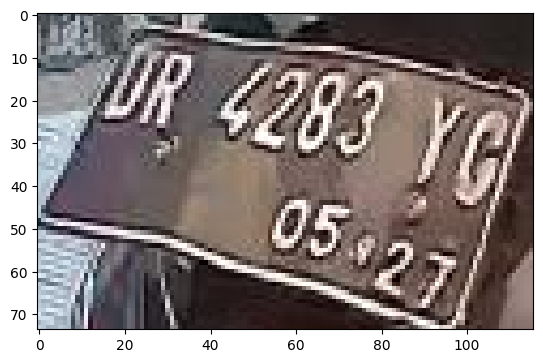

In [16]:
for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result

    if score > threshold:
        # Ekstrak teks dari kotak pembatas menggunakan EasyOCR
        box = frame[int(y1):int(y2), int(x1):int(x2)]
        # plt.imshow(box)

        # Preprocessing citra plat nomor
        # preprocessed_box = preprocess_image(box)
        plt.imshow(box)

        # OCR pada citra yang telah ditingkatkan
        ocr_result = reader.readtext(box)
        text = ' '.join([line[1] for line in ocr_result])

        print(text)
        # Simpan hasil OCR ke file CSV
        # csv_writer.writerow([text])

In [ ]:
 # Tutup file CSV
# csv_file.close()


image 1/1 /content/drive/MyDrive/Colab Notebooks/Parking System/testing data/Tess.jpeg: 640x640 1 License-Plate, 457.0ms
Speed: 5.4ms preprocess, 457.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


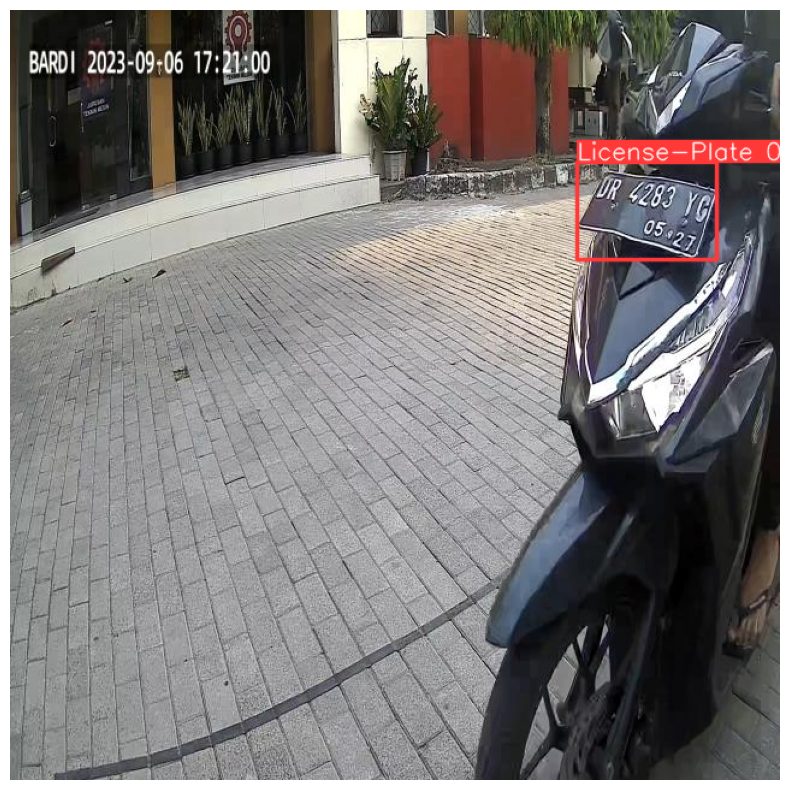

In [20]:
# Load the trained model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/Parking System/output model/last (1).pt')

# Path to your image
image_path = '/content/drive/MyDrive/Colab Notebooks/Parking System/testing data/Tess.jpeg'

# Perform inference directly using the model
results = model(image_path)

# Access the first result (since results is a list)
result = results[0]

# Draw bounding boxes and masks on the image
annotated_image = result.plot()  # Use the plot method to visualize the result

# Convert BGR image to RGB for matplotlib
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Display the annotated image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image_rgb)
plt.axis('off')
plt.show()